In [2]:
!pip3 install fastbook
import fastbook
fastbook.setup_book()
import os
os.environ["OMP_NUM_THREADS"] = "1" 

DEPRECATION: Loading egg at c:\users\nisar\appdata\local\programs\python\python311\lib\site-packages\dubbo_client-1.0.0b6-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\nisar\appdata\local\programs\python\python311\lib\site-packages\kazoo-2.10.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\nisar\appdata\local\programs\python\python311\lib\site-packages\munch-4.0.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\nisar

  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
Using cached requests-2.32.3-py3-none-any.whl (64 kB)
  Attempting uninstall: requests
    Found existing installation: requests 2.26.0
    Uninstalling requests-2.26.0:
      Successfully uninstalled requests-2.26.0


In [3]:
from fastbook import *
from fastai.vision.widgets import *
from pathlib import Path

In [4]:
path = Path('C:/Users/nisar/Desktop/Skin/Test')

leafs = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=1),
    get_y=parent_label,
    item_tfms=Resize(128))

In [5]:
dls = leafs.dataloaders(path)


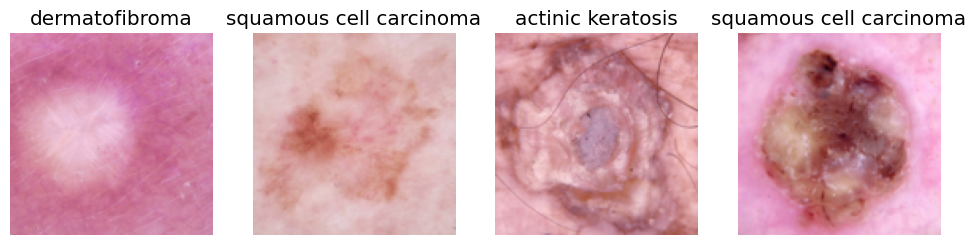

In [6]:
dls.valid.show_batch(max_n=4, nrows=1)


In [7]:
leafs = leafs.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = leafs.dataloaders(path)

In [8]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

c:\Users\nisar\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastai\vision\learner.py:301: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")


epoch,train_loss,valid_loss,error_rate,time
0,3.475174,4.185513,0.956522,00:37


epoch,train_loss,valid_loss,error_rate,time
0,3.822312,3.698208,0.956522,00:27
1,3.602685,3.301642,0.956522,00:12
2,3.440588,3.023542,1.000000,00:12
3,3.289404,2.812145,0.956522,00:11


In [9]:
# Exporting the learner
learn.export('all.pkl')

# Loading the learner
from fastai.learner import load_learner
from pathlib import Path

path = Path() 
learn_inf = load_learner(path/'all.pkl')
